# **Crafting A Story** 
#### In this notebook I will take the Fifa2022 Dataset and analyze it, looking for any interesting trends.  My overall hypothesis will be to see if Defense is more important than Offense in determining the winning side for this particular tournament.  We will be brief in this notebook but yet still examine defensive metrics as well as comparing them to some offensive metrics to see at least in this dataset which contributed more to the outcome.

#### First let's read in the data so we can use it as well as any libraries we will need.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
fifa_data = pd.read_csv("Fifa2022 Data.csv")
fifa_data.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20-Nov-22,17:00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21-Nov-22,14:00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21-Nov-22,17:00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21-Nov-22,20:00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22-Nov-22,11:00,Group C,...,1,0,4,14,0,0,65,80,163,361


#### Great now let's inspect the data a bit to see what we are working with.

In [4]:
fifa_data.shape

(64, 88)

In [5]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

In [6]:
fifa_data.describe()

,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.578125,1.109375,11.140625,11.281250,1.109375,1.578125,1.468750,0.984375,0.093750,0.109375,...,0.140625,0.125000,11.593750,11.359375,0.015625,0.015625,71.968750,70.125000,289.750000,293.265625
std,1.551289,1.055856,4.972519,5.807682,1.055856,1.551289,1.563155,0.999876,0.293785,0.314576,...,0.350382,0.377964,5.911299,4.990045,0.125000,0.125000,14.394629,13.531269,88.406888,80.916230
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,38.000000,44.000000,139.000000,141.000000
25%,0.000000,0.000000,8.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.750000,8.000000,0.000000,0.000000,63.000000,60.250000,229.000000,233.750000
50%,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,11.000000,10.000000,0.000000,0.000000,71.000000,72.000000,281.000000,292.500000
75%,2.000000,2.000000,14.000000,14.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,83.500000,79.000000,328.000000,327.500000
max,7.000000,4.000000,25.000000,32.000000,4.000000,7.000000,7.000000,4.000000,1.000000,1.000000,...,1.000000,2.000000,32.000000,26.000000,1.000000,1.000000,101.000000,104.000000,637.000000,585.000000


In [7]:
fifa_data.isnull().sum()

team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64

In [8]:
fifa_data.columns

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right in

#### Alright we can see based on the output(s) from above that we have no missing values in our dataset, that there are 64 rows and 88 columns, and I also printed out the list of all the columns as well as a summary for each column to get an idea of their statistical overview.

#### Since we are wanting to see if Defense is more important than Offense, contributed to more victories in this dataset.  I will start with five specific plots and go from there.

#### First we will look at comparing Goal Preventions and Number of Goals Scored for each team.

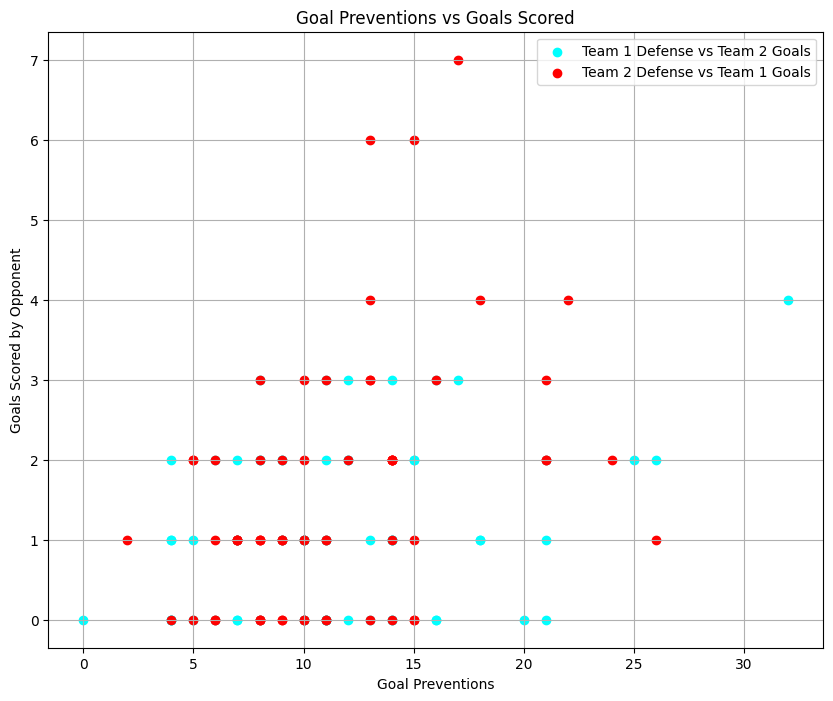

In [10]:
plt.figure(figsize = (10,8))
plt.scatter(fifa_data['goal preventions team1'], fifa_data['number of goals team2'], color = 'cyan', label = 'Team 1 Defense vs Team 2 Goals')
plt.scatter(fifa_data['goal preventions team2'], fifa_data['number of goals team1'], color = 'red', label = 'Team 2 Defense vs Team 1 Goals')
plt.title('Goal Preventions vs Goals Scored')
plt.xlabel('Goal Preventions')
plt.ylabel('Goals Scored by Opponent')
plt.legend()
plt.grid(True)
plt.show()

#### In this plot there isn't really a definitive correlation to show that Goal Preventions 'prevented' the opposing team from scoring that much less, as the scatter points are all spread apart.  Other factors seem to be in play here.  Let's keep moving.

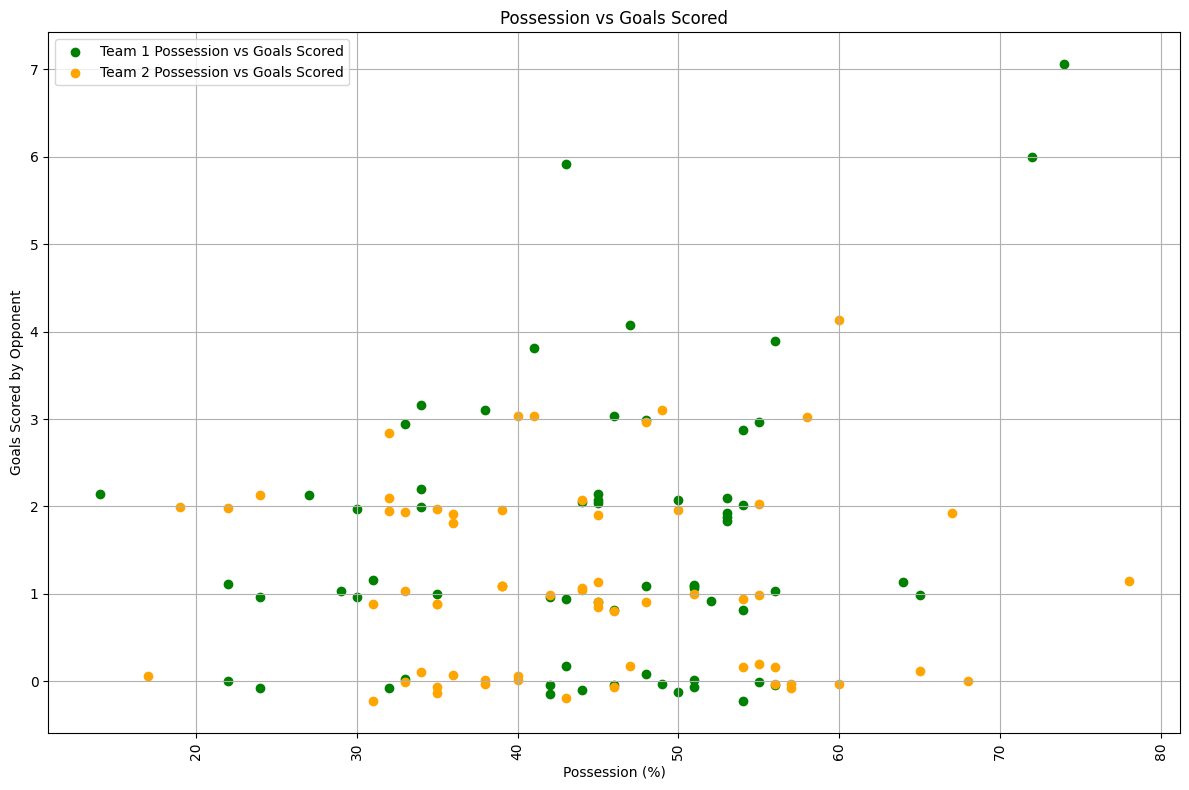

In [20]:
# For the possession columns we need to reformat to remove the % and change the type
# Since possession is an object now though we will need to change it to a str first.
fifa_data['possession team1'] = fifa_data['possession team1'].astype(str).str.rstrip('%').astype(float)
fifa_data['possession team2'] = fifa_data['possession team2'].astype(str).str.rstrip('%').astype(float)

# After seeing the plot for the first time some of the points were almost on top of each other.
# Introducing jitter to separate them some.

jitter = np.random.normal(0, 0.1, size = len(fifa_data))

plt.figure(figsize = (12,8))
plt.scatter(fifa_data['possession team1'], fifa_data['number of goals team1'] + jitter, color = 'green', label = 'Team 1 Possession vs Goals Scored')
plt.scatter(fifa_data['possession team2'], fifa_data['number of goals team2'] + jitter, color = 'orange', label = 'Team 2 Possession vs Goals Scored')
plt.title('Possession vs Goals Scored')
plt.xlabel('Possession (%)')
plt.ylabel('Goals Scored by Opponent')
plt.legend()
plt.grid(True)
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

#### In this scatter plot there again is no definitive trend.  Higher possession teams (with over 60% possession) don't necessarily score that many more goals.  In fact from the values observed they scored less.  Most of the data points seem to be clustered around 1-2 goals so there is another metric at play we need to look at.

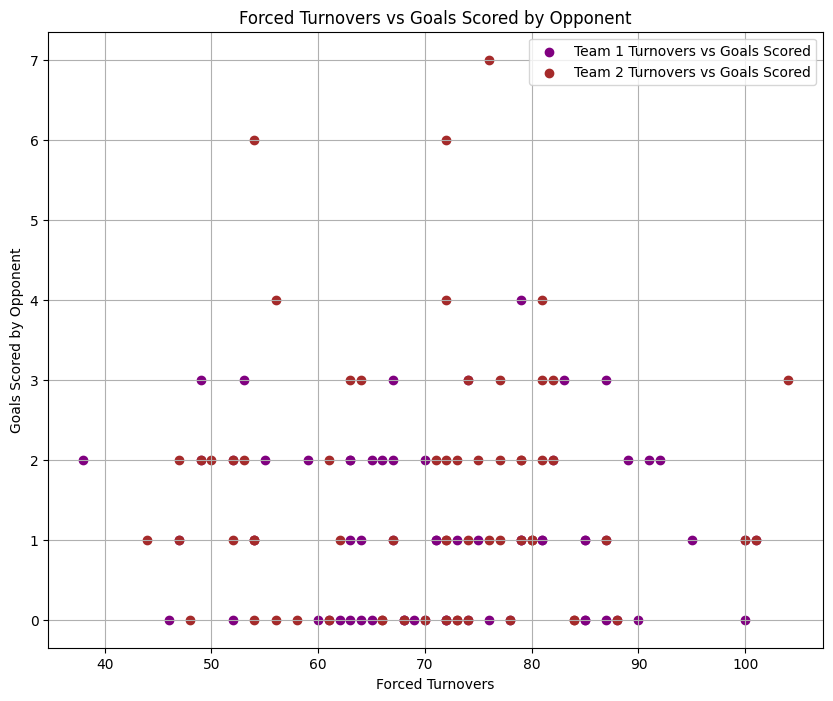

In [22]:
plt.figure(figsize = (10,8))
plt.scatter(fifa_data['forced turnovers team1'], fifa_data['number of goals team2'], color = 'purple', label = 'Team 1 Turnovers vs Goals Scored')
plt.scatter(fifa_data['forced turnovers team2'], fifa_data['number of goals team1'], color = 'brown', label = 'Team 2 Turnovers vs Goals Scored')
plt.title('Forced Turnovers vs Goals Scored by Opponent')
plt.xlabel('Forced Turnovers')
plt.ylabel('Goals Scored by Opponent')
plt.legend()
plt.grid(True)
plt.show()

#### We still aren't seeing anything that we need to through these plots.  For sure isn't helping the hypothesis measure.  Let's just do one more for the defensive side then switch gears a bit.

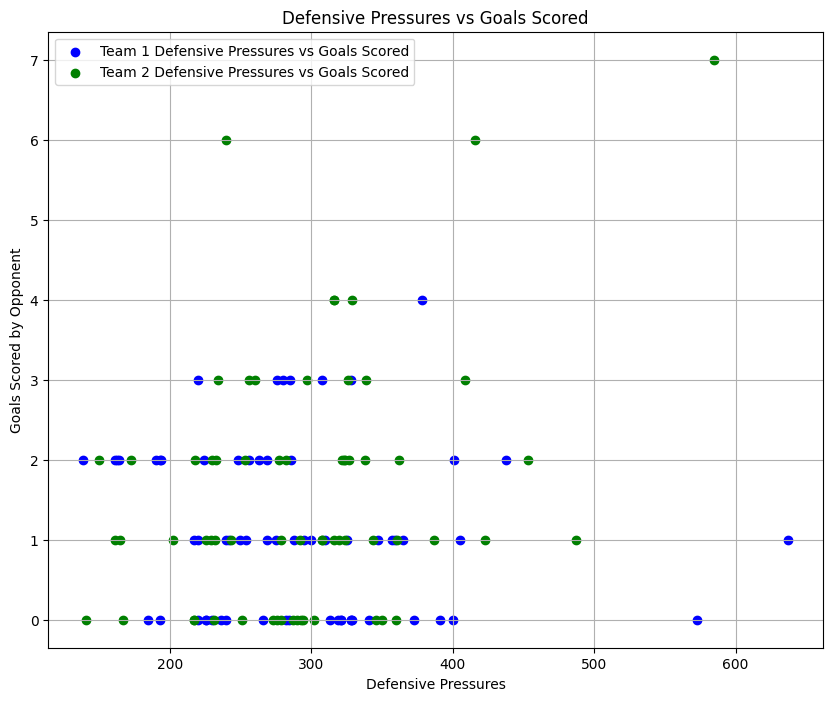

In [24]:
plt.figure(figsize = (10,8))
plt.scatter(fifa_data['defensive pressures applied team1'], fifa_data['number of goals team2'], color = 'blue', label = 'Team 1 Defensive Pressures vs Goals Scored')
plt.scatter(fifa_data['defensive pressures applied team2'], fifa_data['number of goals team1'], color = 'green', label = 'Team 2 Defensive Pressures vs Goals Scored')
plt.title('Defensive Pressures vs Goals Scored')
plt.xlabel('Defensive Pressures')
plt.ylabel('Goals Scored by Opponent')
plt.legend()
plt.grid(True)
plt.show()




#### Yes it appears that at least in what we've looked at Defense (in our case study dataset) doesn't matter MORE than Offense in determining match outcome.  Let's however take a look at a couple of plots where we examine the effect of Offense on Goals Scored in the matches.

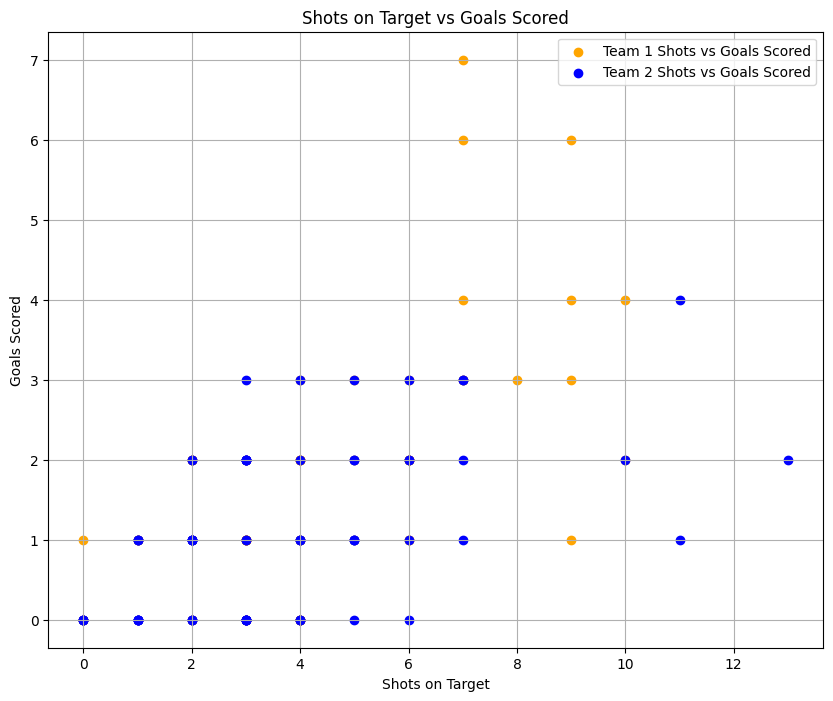

In [26]:
plt.figure(figsize = (10,8))
plt.scatter(fifa_data['on target attempts team1'], fifa_data['number of goals team1'], color = 'orange', label = 'Team 1 Shots vs Goals Scored')
plt.scatter(fifa_data['on target attempts team2'], fifa_data['number of goals team2'], color = 'blue', label = 'Team 2 Shots vs Goals Scored')
plt.title('Shots on Target vs Goals Scored')
plt.xlabel('Shots on Target')
plt.ylabel('Goals Scored')
plt.legend()
plt.grid(True)
plt.show()

#### Here in the plot above its a bit more conclusive.  We can start to see from Team 2's (blue) data points that as more quality on target shots are taken the more goals on average that are scored. 

#### I still want to be able to more completely rule out the defensive side of the hypothesis, so let's plot one more now that we are looking at this from another angle (not pure defensive metrics).

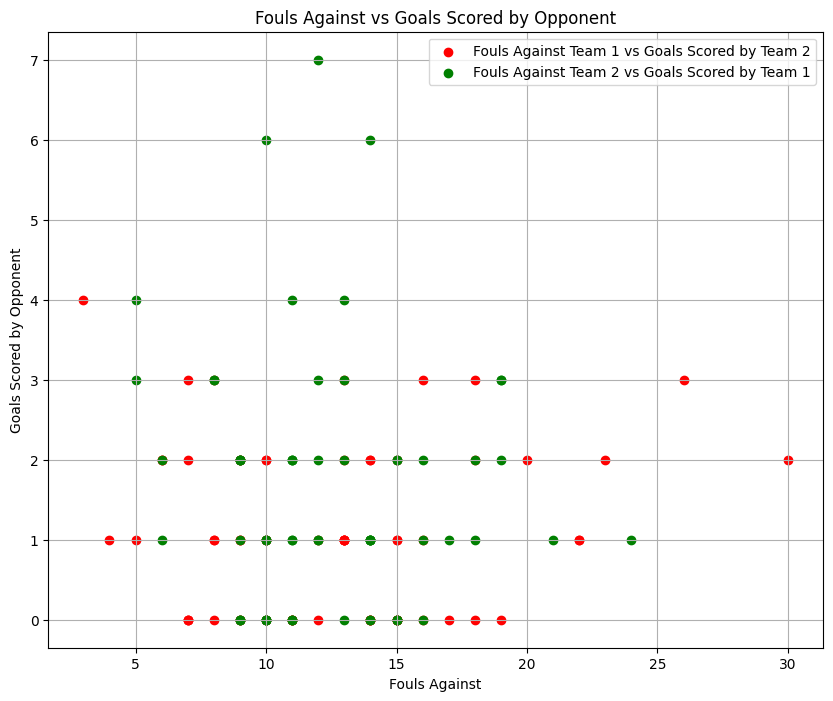

In [27]:
plt.figure(figsize = (10,8))
plt.scatter(fifa_data['fouls against team1'], fifa_data['number of goals team2'], color = 'red', label = 'Fouls Against Team 1 vs Goals Scored by Team 2')
plt.scatter(fifa_data['fouls against team2'], fifa_data['number of goals team1'], color = 'green', label = 'Fouls Against Team 2 vs Goals Scored by Team 1')
plt.title('Fouls Against vs Goals Scored by Opponent')
plt.xlabel('Fouls Against')
plt.ylabel('Goals Scored by Opponent')
plt.legend()
plt.grid(True)
plt.show()

#### Not terribly surprising at this point to see no clear correlation in our data once again, though we still see the same clustering around the goal grouping of 0-2.

# Hypothesis Recap

## "Defense Is More Important Than Offense".

### Final Hypothesis Result:
 
#### The stated hypothesis is **not supported by the data**.  Instead the evidence suggests only slightly, based on plotting performed, rather that **offense** has a greater impact on match outcomes.  Specifically, creating and converting chances with shots on target.  Of course more thorough investigations would need to be conducted before this is definitively proven.